In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from Analisis_Predictivo import Analisis_Predictivo
from Analisis_Predictivo import Graficar
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

import os
os.chdir("/home/william/Desktop")

In [2]:
potabilidad = pd.read_csv("potabilidad_V2.csv")
potabilidad = potabilidad.iloc[:,1:]
potabilidad["Potability"] = potabilidad["Potability"].astype('category')

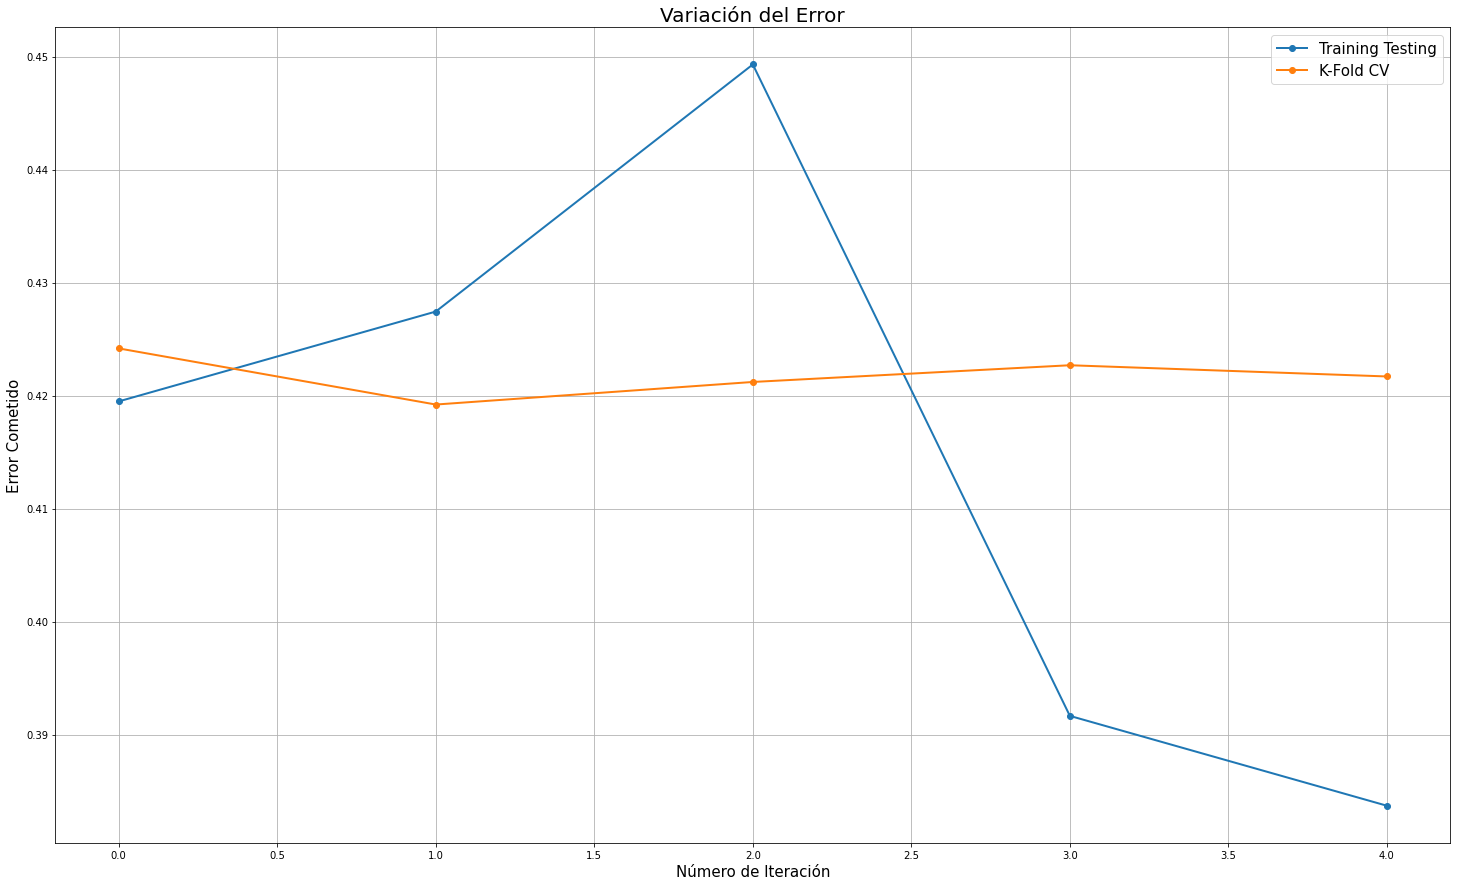

In [3]:
kne =  KNeighborsClassifier(n_neighbors=50, algorithm="auto")
analisisKne = Analisis_Predictivo(potabilidad,predecir= "Potability",modelo=kne,
                                       train_size= 0.75)
analisisKne.graficar_validacion_error_validacion_kfold_vs_testing(5)

El error de cometido de cross-validation es mucho más constante, que el error de training testing, yo considero esto positivo porque básicamente es más confiable a la hora de evaluar un modelo de machine learning.

In [4]:
entropyTree =  DecisionTreeClassifier(criterion="entropy")
giniTree =  DecisionTreeClassifier(criterion="gini")

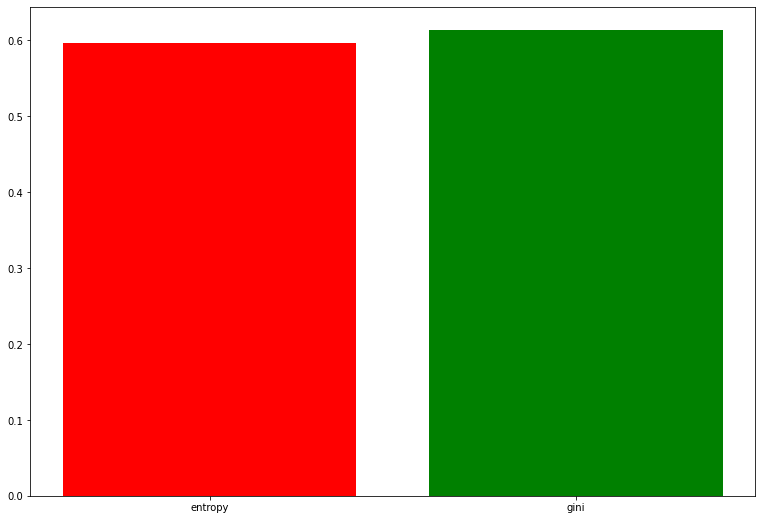

In [5]:
graficar = Graficar(models=[entropyTree, giniTree],label=["entropy","gini"], color=["red", "green"], x=analisisKne.x, y=analisisKne.y)
graficar.barras()

La barra verde es del GINI, y se ve que es mucho mejor modelo que el entropy

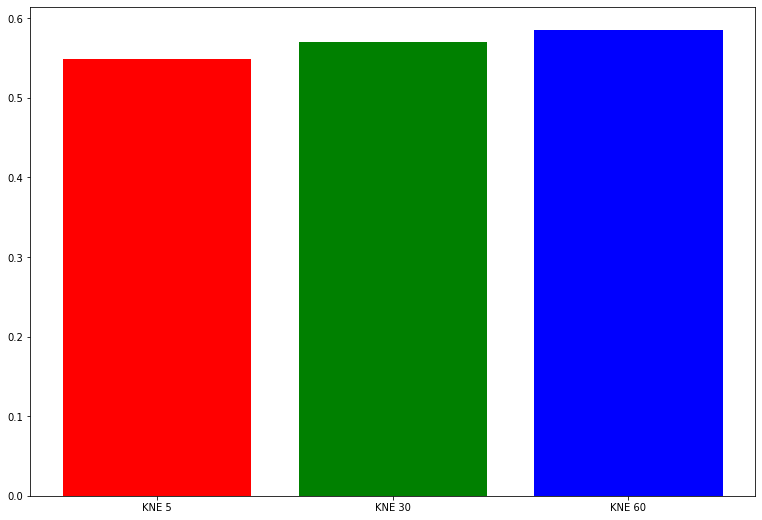

In [6]:

kne5 =  KNeighborsClassifier(n_neighbors=5, algorithm="auto")
kne30 =  KNeighborsClassifier(n_neighbors=30, algorithm="auto")
kne60 =  KNeighborsClassifier(n_neighbors=60, algorithm="auto")

graficar = Graficar(models=[kne5, kne30, kne60],label=["KNE 5","KNE 30","KNE 60"], color=["red", "green", "blue"], x=analisisKne.x, y=analisisKne.y)
graficar.barras()

Los 60 cluster son la mejor forma de predecir, el color azul

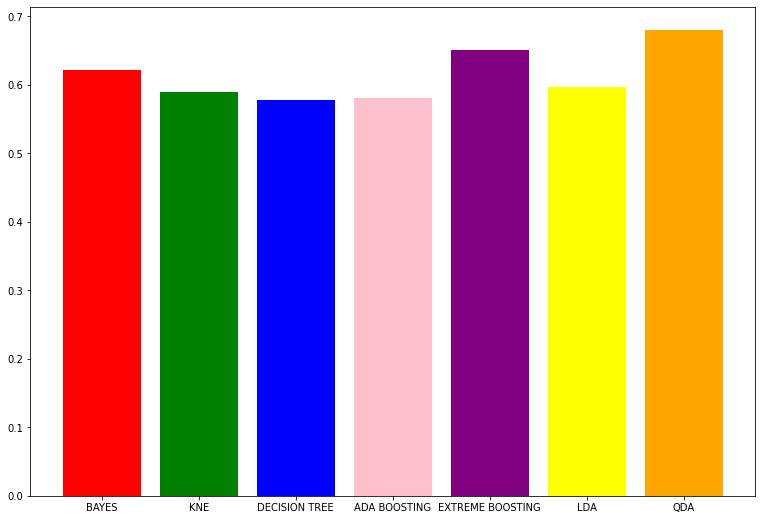

In [7]:
bayes = GaussianNB()
kne =  KNeighborsClassifier(n_neighbors=60, algorithm="auto")
decisionTree =  DecisionTreeClassifier(criterion="gini")
adaBoosting = AdaBoostClassifier()
extremeGradiantBoosting = GradientBoostingClassifier()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()


graficar = Graficar(models=[bayes, kne, decisionTree, adaBoosting, extremeGradiantBoosting, lda, qda],label=["BAYES","KNE","DECISION TREE","ADA BOOSTING","EXTREME BOOSTING", "LDA", "QDA"], color=["red", "green", "blue", "pink", "purple", "yellow", "orange"], x=analisisKne.x, y=analisisKne.y)
graficar.barras()

El mejor modelo es el QDA segun el grafico de arriba, lo probe varias veces y siempre es el mejor